In [38]:
import pandas as pd
import seaborn as sb

In [2]:
hp_data = pd.read_csv('hp_data.csv')

In [3]:
hp_data.head()

,Unnamed: 0,price,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk
0,1341,6300000,BTM Layout,Super built-up Area,1450,Resale,5,1,4,1
1,2126,11500000,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3
2,816,3800000,Whitefield,Super built-up Area,1019,Resale,1,2,5,2
3,2708,10500000,Ambalipura,Super built-up Area,1857,Resale,15,4,5,4
4,1041,11500000,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3


In [9]:
hp_data  = hp_data.iloc[:,1:]

In [16]:
hp_data.shape

(3500, 9)

In [11]:
hp_data.head()

,price,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk
0,6300000,BTM Layout,Super built-up Area,1450,Resale,5,1,4,1
1,11500000,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3
2,3800000,Whitefield,Super built-up Area,1019,Resale,1,2,5,2
3,10500000,Ambalipura,Super built-up Area,1857,Resale,15,4,5,4
4,11500000,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3


In [45]:
X = hp_data['sqft']
print(X.shape)
y = hp_data['price']
X = X.values.reshape(-1,1)
print(X.shape)

(3500,)
(3500, 1)


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model_lr = LinearRegression()

In [30]:
#fit() is used for training ML algo to fit to the DATA
model_lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
hp_data.head()

,price,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk
0,6300000,BTM Layout,Super built-up Area,1450,Resale,5,1,4,1
1,11500000,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3
2,3800000,Whitefield,Super built-up Area,1019,Resale,1,2,5,2
3,10500000,Ambalipura,Super built-up Area,1857,Resale,15,4,5,4
4,11500000,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3


In [32]:
model_lr.predict([[2000]])

array([ 12372728.31247799])

In [34]:
X2 = [[1000],[1200],[1300]]
y2 = [50,60,70]

In [35]:
model_lr2 = LinearRegression()

In [36]:
model_lr2.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
model_lr2.predict([[1500],[2000],[2500]])

array([  81.42857143,  113.57142857,  145.71428571])

In [117]:
X = hp_data.loc[:,['sqft','yearsOld','floor']]
y = hp_data['price']


In [118]:
model_lr_hp = LinearRegression()

In [119]:
model_lr_hp.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [120]:
model_lr_hp.predict([[2000,5,3]])

array([ 12219220.34556934])

In [196]:
X = hp_data.loc[:,['sqft']]
y = hp_data['price']

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [199]:
X_test.shape

(700, 1)

In [200]:
model_lr_hp = LinearRegression()

In [201]:
model_lr_hp.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [202]:
y_predict = model_lr_hp.predict(X_test)

In [203]:
from sklearn.metrics import r2_score

In [204]:
r2_score(y_predict,y_test)

0.32480625998720436

In [205]:
y_test.head()

2509     4025000
3344    15000000
1361     6300000
188      6300000
1707    15000000
Name: price, dtype: int64

In [206]:
y_predict[0:5]

array([ 8090600.91444949,  9286959.73718918,  7228109.67014878,
        7228109.67014878,  9286959.73718918])

In [208]:
model_lr_hp.predict([[1200]])

array([ 4909584.81987806])

In [246]:
import numpy as np
X_gen = np.linspace(500,5000,100)

In [247]:
y_pred = []
for x in X_gen:
    y_pred.append(model_lr_hp.predict(x))

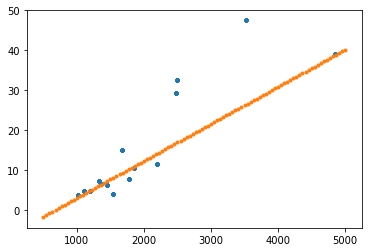

In [252]:
import matplotlib.pyplot as plt
plt.scatter(X.sqft,y/1000000,marker='.')
plt.scatter(np.array(X_gen), np.array(y_pred).ravel()/1000000,marker='.')